### How to use Python to rearrange the content of a table column

This project was part of a Power BI presentation showing the number of vaccines used at different locations. I have decided to create similar plots by applying dataframes features of Python's Pandas library. The notebook regroups the content of a dataframe column in order to create visuals.

The input data set is the "locations.csv" file  from the "Our World in Data" repository related to the Covid-19 pandemic:  https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/locations.csv 

The most recent version of the location file, downloaded on the 12th of March 2022. 

### 1. Importing  data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

file = 'locations12March2022.csv'

owid_df = pd.read_csv(file, sep =',')
owid_df.head(5)

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",6/03/2022,World Health Organization,https://covid19.who.int/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",10/03/2022,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",10/03/2022,World Health Organization,https://africacdc.org/covid-19-vaccination/
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",13/02/2022,World Health Organization,https://covid19.who.int/
4,Angola,AGO,Oxford/AstraZeneca,10/03/2022,World Health Organization,https://africacdc.org/covid-19-vaccination/


In [2]:
owid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   location               223 non-null    object
 1   iso_code               223 non-null    object
 2   vaccines               223 non-null    object
 3   last_observation_date  223 non-null    object
 4   source_name            223 non-null    object
 5   source_website         223 non-null    object
dtypes: object(6)
memory usage: 10.6+ KB


### 2. Preparing data

In [3]:
# splitting vaccine column
owid_df1= owid_df['vaccines'].str.split(',', expand=True)

#replace 10 with len(str...)
owid_df1.columns = ['VaccineNo'+str(i) for i in range(1,10)]

In [4]:
#creating column names
vaccine_df = pd.concat([owid_df, owid_df1], axis=1)
vaccine_df.drop(columns = ['vaccines']).head(5)

,location,iso_code,last_observation_date,source_name,source_website,VaccineNo1,VaccineNo2,VaccineNo3,VaccineNo4,VaccineNo5,VaccineNo6,VaccineNo7,VaccineNo8,VaccineNo9
0,Afghanistan,AFG,6/03/2022,World Health Organization,https://covid19.who.int/,Johnson&Johnson,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,None,None,None,None,None
1,Albania,ALB,10/03/2022,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Oxford/AstraZeneca,Pfizer/BioNTech,Sinovac,Sputnik V,None,None,None,None,None
2,Algeria,DZA,10/03/2022,World Health Organization,https://africacdc.org/covid-19-vaccination/,Oxford/AstraZeneca,Sinopharm/Beijing,Sinovac,Sputnik V,None,None,None,None,None
3,Andorra,AND,13/02/2022,World Health Organization,https://covid19.who.int/,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,None,None,None,None,None,None
4,Angola,AGO,10/03/2022,World Health Organization,https://africacdc.org/covid-19-vaccination/,Oxford/AstraZeneca,None,None,None,None,None,None,None,None


In [5]:
#removing leading and trailing spaces in vaccine columns
for i in range(1,10):
    vaccine_df['VaccineNo'+str(i)] = vaccine_df['VaccineNo'+str(i)].str.rstrip()
    vaccine_df['VaccineNo'+str(i)] = vaccine_df['VaccineNo'+str(i)].str.lstrip()

### 3. Creating new data frame

In [6]:
#Number of countries by the first vaccine choice
df1=vaccine_df.groupby(["VaccineNo1"])[["location"]].count()
df1.index.names=['Vaccine']
df1.rename(columns={'location':'NumberOfCountries'}, inplace = True)
df1.head(5)

,NumberOfCountries
Vaccine,
Abdala,4
COVIran Barekat,1
CanSino,7
Covaxin,7
EpiVacCorona,2


In [7]:
#number of countries with DfNo vaccine choices
def CreateDFs(DfNo):
   df = vaccine_df.groupby(['VaccineNo'+str(DfNo)])[["location"]].count()
   df.index.names=['Vaccine']
   df.rename(columns={'location':'NumberOfCountries'}, inplace = True)
   return df

In [8]:
df2 = CreateDFs(2) 
df3 = CreateDFs(3) 
df4 = CreateDFs(4) 
df5 = CreateDFs(5) 

In [9]:
df6 = CreateDFs(6) 
df7 = CreateDFs(7) 
df8 = CreateDFs(8)

In [10]:
#merging dataframes
new_df = pd.merge(df1,df2, on = ['Vaccine'], how = 'outer', suffixes = ['1', '2'])
new_df1 = new_df['NumberOfCountries1'].fillna(0) + new_df['NumberOfCountries2'].fillna(0)

new_df = pd.merge(df3,df4, on = ['Vaccine'], how = 'outer', suffixes = ['1', '2'])
new_df2 = new_df['NumberOfCountries1'].fillna(0) + new_df['NumberOfCountries2'].fillna(0)

new_df = pd.merge(df5,df6, on = ['Vaccine'], how = 'outer', suffixes = ['1', '2'])
new_df3 = new_df['NumberOfCountries1'].fillna(0) + new_df['NumberOfCountries2'].fillna(0)

new_df = pd.merge(df7,df8, on = ['Vaccine'], how = 'outer', suffixes = ['1', '2'])
new_df4 = new_df['NumberOfCountries1'].fillna(0) + new_df['NumberOfCountries2'].fillna(0)

In [11]:
type(new_df1)

pandas.core.series.Series

### 4. Preparing data frame

In [12]:
df_new = pd.concat([new_df1,new_df2, new_df3, new_df4], axis = 1)
df_new1 =  df_new[0].fillna(0) + df_new[1].fillna(0) + df_new[2].fillna(0) + df_new[3].fillna(0)

In [13]:
#number of countries per vaccine types
df_new1.head(20)

Vaccine
Abdala                  4.0
COVIran Barekat         1.0
CanSino                 7.0
Covaxin                 9.0
EpiVacCorona            2.0
Johnson&Johnson        87.0
Medigen                 1.0
Moderna                88.0
Oxford/AstraZeneca    182.0
Pfizer/BioNTech       156.0
QazVac                  2.0
Sinopharm/Beijing      88.0
Sputnik V              57.0
Sinovac                50.0
Soberana Plus           1.0
FAKHRAVAC               1.0
Novavax                10.0
Sinopharm/Wuhan         2.0
Soberana02              4.0
Turkovac                1.0
dtype: float64

### 5. Creating Plot

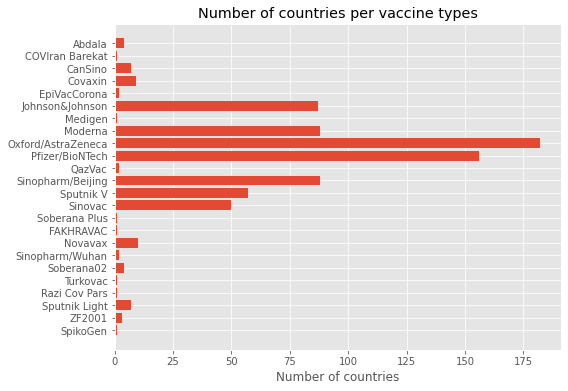

In [14]:
#Horizontal Barplot
fig,ax = plt.subplots(figsize=(8,6))

vaccines = [df_new1.index[i] for i in range(0,len(df_new1))]
y_pos = [df_new1[i] for i in range(0,len(df_new1))]

ax.barh(vaccines,y_pos, align='center')
ax.invert_yaxis()
ax.set_xlabel('Number of countries')
ax.set_title('Number of countries per vaccine types')
plt.show()

### 6. Number of vaccines per country

In [15]:
owid_df['vaccine_no'] = [len(owid_df['vaccines'].str.split(',')[i]) 
                         for i in range (len(owid_df['vaccines']))]

owid_df[['location','vaccine_no']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    223 non-null    object
 1   vaccine_no  223 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [16]:
owid_df[['location','vaccine_no']].tail(5)

,location,vaccine_no
218,Wales,3
219,Wallis and Futuna,1
220,Yemen,3
221,Zambia,3
222,Zimbabwe,4
